In [58]:
import config

In [59]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import k_means
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import difflib
import random
from IPython.display import IFrame

In [60]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [61]:
def load_original_data():
    file1 = pd.read_csv('playlisy_3672.csv',index_col = 0)
    file2 = pd.read_csv('playlisy_1612.csv',index_col = 0)
    file3 = pd.read_csv('playlisy_148.csv',index_col = 0)
    file4 = pd.read_csv('playlisy_602.csv',index_col = 0)
    
    
    return pd.concat([file1,file2,file3, file4], axis=0).reset_index(drop=True)

In [62]:
final_playlist = load_original_data()
#final_playlist

In [63]:
# should not run this in case of population error
final_playlist_w_id = final_playlist.drop(final_playlist.columns[[11, 13, 14, 15]], axis=1) 
#final_playlist_w_id

### Dropping few columns

In [64]:
final_playlist = final_playlist.drop(final_playlist.columns[[11, 12, 13, 14, 15]], axis=1) 
final_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.1090,0.385,133.449,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,136.302,222813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.718,0.357,2,-8.843,1,0.0437,0.407000,0.000000,0.0897,0.347,146.006,230548,4
6030,0.626,0.584,0,-6.913,1,0.1020,0.782000,0.000000,0.2080,0.408,102.045,183360,4
6031,0.708,0.485,2,-5.552,1,0.0699,0.210000,0.000000,0.1040,0.281,139.990,151041,4
6032,0.693,0.643,4,-5.867,0,0.0828,0.138000,0.000000,0.1080,0.477,95.055,163450,4


### Bill Board dataframe (Web Scraping)

In [65]:
Bill_borad_top_100 = pd.read_csv('Bill board top 100 songs.csv',index_col = 0)

In [66]:
Bill_borad_top_100

,song_name,song_artist,song
0,as it was,harry styles,As It Was by Harry Styles
1,first class,jack harlow,First Class by Jack Harlow
2,heat waves,glass animals,Heat Waves by Glass Animals
3,big energy,latto,Big Energy by Latto
4,enemy,imagine dragons x jid,Enemy by Imagine Dragons X Jid
...,...,...,...
95,p power,gunna featuring drake,P Power by Gunna Featuring Drake
96,money so big,yeat,Money So Big by Yeat
97,blick blick!,coi leray & nicki minaj,Blick Blick! by Coi Leray & Nicki Minaj
98,fall in love,bailey zimmerman,Fall In Love by Bailey Zimmerman


### Normalising DataFrame

In [67]:
scaler = StandardScaler()
scaler.fit(final_playlist)
final_playlist_scaled = scaler.transform(final_playlist)
final_playlist_scaled_df = pd.DataFrame(final_playlist_scaled, columns = final_playlist.columns)
display(final_playlist.head())
print()
display(final_playlist_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.189,0.557,95.263,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.106,0.720,116.761,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,337413,4
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.109,0.385,133.449,219027,4
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.128,0.931,136.302,222813,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.598187,0.414021,-1.481714,0.339724,0.687332,-0.545975,1.438948,-0.378862,0.047590,0.053768,-0.907554,1.251262,0.197588
1,-0.478795,1.251650,-1.202021,0.856794,0.687332,-0.205648,-0.920324,-0.378087,-0.504151,0.707631,-0.122185,0.613233,0.197588
2,-1.302603,-0.743748,-0.362942,-1.318842,-1.454901,-0.050190,0.015589,-0.378387,4.920195,-1.478599,1.575028,0.947831,0.197588
3,-1.111575,-0.673580,1.315215,0.151513,-1.454901,-0.512363,0.131782,-0.378307,-0.484209,-0.636199,0.487464,-0.168211,0.197588
4,0.840491,1.036761,-0.922328,0.101686,0.687332,-0.522166,-0.796790,-0.236890,-0.357906,1.554043,0.591691,-0.132520,0.197588



### Clustering with K-Means

In [68]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(final_playlist_scaled_df)

KMeans(n_clusters=9, random_state=1234)

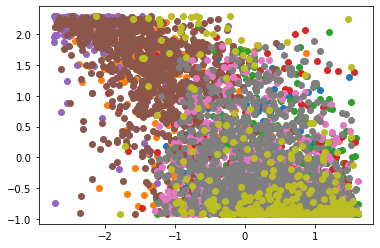

In [69]:
# assign a cluster to each example
labels = kmeans.predict(final_playlist_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(final_playlist_scaled_df.to_numpy()[row_ix, 1], final_playlist_scaled_df.to_numpy()[row_ix, 6])
    # show the plot
pyplot.show()

In [70]:
clusters = kmeans.predict(final_playlist_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     359
1     295
2     851
3     305
4     175
5     927
6    1163
7    1609
8     350
dtype: int64

#### Adding cluster column

In [71]:
final_playlist["cluster"] = clusters
final_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4,5
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,301920,4,7
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4,3
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.1090,0.385,133.449,219027,4,6
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,136.302,222813,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.718,0.357,2,-8.843,1,0.0437,0.407000,0.000000,0.0897,0.347,146.006,230548,4,5
6030,0.626,0.584,0,-6.913,1,0.1020,0.782000,0.000000,0.2080,0.408,102.045,183360,4,5
6031,0.708,0.485,2,-5.552,1,0.0699,0.210000,0.000000,0.1040,0.281,139.990,151041,4,7
6032,0.693,0.643,4,-5.867,0,0.0828,0.138000,0.000000,0.1080,0.477,95.055,163450,4,6


In [72]:
playlist = pd.concat([final_playlist, final_playlist_w_id.id ], axis =1)
playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,id
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4,5,3AhXZa8sUQht0UEdBJgpGc
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,301920,4,7,4CeeEOM32jQcH3eN9Q2dGj
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4,3,0hKRSZhUGEhKU6aNSPBACZ
3,0.396,0.473,10,-7.670,0,0.0345,0.326000,0.000124,0.1090,0.385,133.449,219027,4,6,5t9KYe0Fhd5cW6UYT4qP8f
4,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,136.302,222813,4,7,2PzU4IB8Dr6mxV3lHuaG34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.718,0.357,2,-8.843,1,0.0437,0.407000,0.000000,0.0897,0.347,146.006,230548,4,5,4pV3f1Nn5XtyA9x60rFan7
6030,0.626,0.584,0,-6.913,1,0.1020,0.782000,0.000000,0.2080,0.408,102.045,183360,4,5,28WoBIA4EDVvxiraTv2KZ2
6031,0.708,0.485,2,-5.552,1,0.0699,0.210000,0.000000,0.1040,0.281,139.990,151041,4,7,3K8tRD2Prik7FXbD8lZ6DC
6032,0.693,0.643,4,-5.867,0,0.0828,0.138000,0.000000,0.1080,0.477,95.055,163450,4,6,2UN0lp72LAusrXi8LLVomt


In [53]:
final_playlist['cluster'].value_counts()

7    1609
6    1163
5     927
2     851
0     359
8     350
3     305
1     295
4     175
Name: cluster, dtype: int64

In [54]:
# should not run this in case of population error
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(final_playlist_scaled_df)
print(kmeans2.inertia_)

26053.705428938403


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

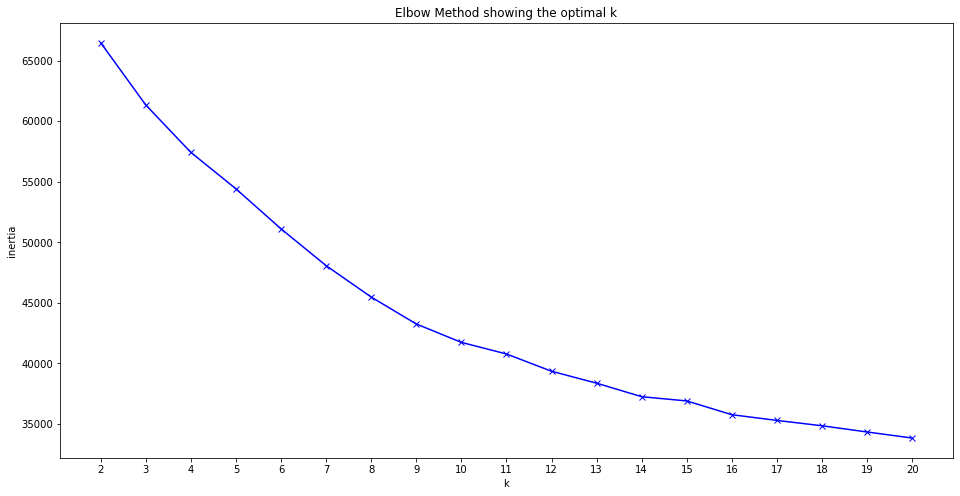

In [55]:
# should not run this in case of population error
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(final_playlist_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [73]:
def Recommendation():
    Song = input("Enter your song: ")
    if Bill_borad_top_100.song_name.str.contains(Song, na = False, case=False).any()==True:
        print("Recommended Hot Song from Bill Board: " + random.choice(Bill_borad_top_100.song))
    else:
        if difflib.get_close_matches(Song, Bill_borad_top_100.song_name, n = 1)!= []:
            print("Did you mean: " + difflib.get_close_matches(Song, Bill_borad_top_100.song_name, n = 1)[0] + " ?")
            yes_no = input() 
            if yes_no == "Yes":
                print("Another Recommended Hot Song from Bill Board : " + random.choice(Bill_borad_top_100.song))
            elif yes_no == 'No':
                a = sp.search(Song,limit=1,market="GB")
                b = sp.audio_features(a['tracks']['items'][0]['uri'])
                c = pd.json_normalize(b)
                c = c.drop(c.columns[[11, 12, 13, 14, 15]], axis=1) 
                c_scaled = scaler.transform(c)
                c_scaled_df = pd.DataFrame(c_scaled, columns = c.columns)
                d = kmeans.predict(c_scaled_df)
                e = d[0].item()
                id_column = list(playlist[playlist['cluster'] == e ]['id'])
                track_id = random.sample(id_column, 1)
                track_id = track_id[0]
                X = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
                width="320", height="80",
                frameborder="0", allowtransparency="true", allow="encrypted-media")
                print("It's not a Hot song, so here is another recommended song from spotify")
                return(X) 
        else:
                a = sp.search(Song,limit=1,market="GB")
                b = sp.audio_features(a['tracks']['items'][0]['uri'])
                c = pd.json_normalize(b)
                c = c.drop(c.columns[[11, 12, 13, 14, 15]], axis=1) 
                c_scaled = scaler.transform(c)
                c_scaled_df = pd.DataFrame(c_scaled, columns = c.columns)
                d = kmeans.predict(c_scaled_df)
                e = d[0].item()
                id_column = list(playlist[playlist['cluster'] == e ]['id'])
                track_id = random.sample(id_column, 1)
                track_id = track_id[0]
                X = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
                width="320", height="80",
                frameborder="0", allowtransparency="true", allow="encrypted-media")
                print("It's not a Hot song, so here is another recommended song from spotify")
                return(X) 

In [75]:
Recommendation()


Enter your song: piano
It's not a Hot song, so here is another recommended song from spotify


In [ ]:

a = sp.search('it will rain',limit=1,market="GB")
b = sp.audio_features(a['tracks']['items'][0]['uri'])
c = pd.json_normalize(b)
c = c.drop(c.columns[[11, 12, 13, 14, 15]], axis=1) 
c_scaled = scaler.transform(c)
c_scaled_df = pd.DataFrame(c_scaled, columns = c.columns)
d = kmeans.predict(c_scaled_df)
e = d[0].item()
#id_column = list(playlist[playlist['cluster'] == e ]['id'])
e

In [ ]:
playlist.danceability.min()